## EJEMPLO IRIS

## 1. Carga y representación gráfica de los datos

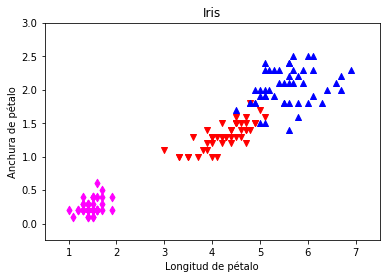

In [1]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data[:,[2,3]]
Y = iris.target

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

fig = plt.figure()
ax = fig.add_subplot()
ax.axis([0.5, 7.5, -0.25, 3])
ax.scatter(X[0:49,0], X[0:49,1], color="magenta", marker="d")
ax.scatter(X[50:99,0], X[50:99,1], color="r", marker="v")
ax.scatter(X[100:149,0], X[100:149,1], color="b", marker="^")
ax.set_title("Iris")
ax.set_xlabel("Longitud de pétalo")
ax.set_ylabel("Anchura de pétalo")
plt.show()

## 2. Árbol de decisión y representación de las fronteras de clasificación

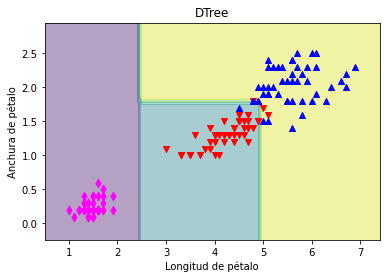

In [2]:
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import numpy as np

# plot decission regions of the DTree classifier
abd = tree.DecisionTreeClassifier(criterion="entropy",max_depth=3)
abd.fit(X, Y)
#y1_min, y1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
#y2_min, y2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
y1_min, y1_max = 0.5, 7.5
y2_min, y2_max = -0.25, 3
xx, yy = np.meshgrid(np.arange(y1_min, y1_max, 0.1), np.arange(y2_min, y2_max, 0.1)) 
f, axarr = plt.subplots()
Z = abd.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
axarr.contourf(xx, yy, Z, alpha=0.4)
axarr.scatter(X[0:49,0], X[0:49,1], color="magenta", marker="d")
axarr.scatter(X[50:99,0], X[50:99,1], color="r", marker="v")
axarr.scatter(X[100:149,0], X[100:149,1], color="b", marker="^")
axarr.set_title("DTree")
axarr.set_xlabel("Longitud de pétalo")
axarr.set_ylabel("Anchura de pétalo")
plt.show()

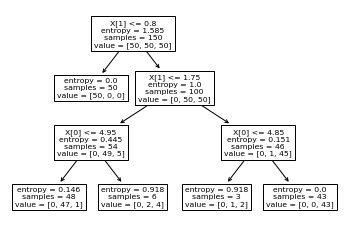

In [3]:
tree.plot_tree(abd)
plt.show()

## Ejercicios

#### 1. El aprendizaje de arboles de clasificación tal como se ha visto en clase requiere que se defina la impureza de un nodo. Además de la entropía se pueden utilizar otros criterios como el índice Gini. Explora esta posibilidad en los ejemplos de las iris y de los dígitos manuscritos. Para realizar experimentos significativos recuerda realizar validación cruzada y obtener intervalos de confianza.

Cálculo del índice Gini: gini = $1- \sum\limits_{K}{p_K^2}$ donde pk es la proporción de prototipos de una clase en un nodo t (P(k|t))

https://relopezbriega.github.io/blog/2016/05/29/machine-learning-con-python-sobreajuste/

#### 1.1. IRIS (4D)

In [3]:
import pandas as pd

In [4]:
iris = datasets.load_iris()
iris_X = iris.data
iris_Y = iris.target
iris_X1 = iris_X[:,[2,3]]

iris_abd = tree.DecisionTreeClassifier(criterion="gini",max_depth = 3)
iris_abd.fit(iris_X1,iris_Y)

DecisionTreeClassifier(max_depth=3)

In [5]:
cols = iris.feature_names
cols

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

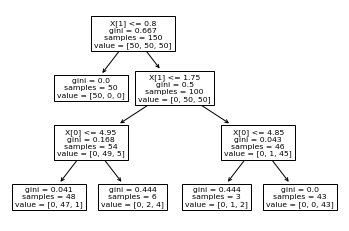

In [6]:
tree.plot_tree(iris_abd)
plt.show()

In [7]:
from sklearn.model_selection import cross_val_score

entabd = tree.DecisionTreeClassifier(criterion="entropy")
ginabd = tree.DecisionTreeClassifier(criterion="gini")
entabd3 = tree.DecisionTreeClassifier(criterion="entropy",max_depth=3)
ginabd3 = tree.DecisionTreeClassifier(criterion="gini",max_depth=3)
modelos = [entabd,ginabd,entabd3,ginabd3]

for modelo in modelos:
    cv = cross_val_score(modelo,iris_X,iris_Y,cv=5,scoring="accuracy")
    print(f"Intervalo de confianza: {cv.mean()} +/- {cv.std()*2}")

Intervalo de confianza: 0.9533333333333334 +/- 0.06798692684790378
Intervalo de confianza: 0.9600000000000002 +/- 0.06531972647421806
Intervalo de confianza: 0.96 +/- 0.04988876515698587
Intervalo de confianza: 0.96 +/- 0.04988876515698587


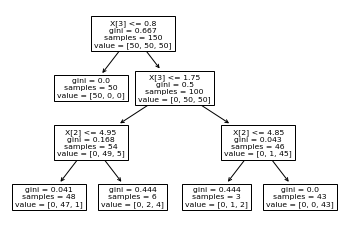

In [8]:
ginabd3.fit(iris_X,iris_Y)
tree.plot_tree(ginabd3)
plt.show()

#### 1.2) DIGITS

In [9]:
digits = datasets.load_digits()
digits_X = digits.data
digits_Y = digits.target
digits_variables = digits.feature_names

In [10]:
digits_variables

['pixel_0_0',
 'pixel_0_1',
 'pixel_0_2',
 'pixel_0_3',
 'pixel_0_4',
 'pixel_0_5',
 'pixel_0_6',
 'pixel_0_7',
 'pixel_1_0',
 'pixel_1_1',
 'pixel_1_2',
 'pixel_1_3',
 'pixel_1_4',
 'pixel_1_5',
 'pixel_1_6',
 'pixel_1_7',
 'pixel_2_0',
 'pixel_2_1',
 'pixel_2_2',
 'pixel_2_3',
 'pixel_2_4',
 'pixel_2_5',
 'pixel_2_6',
 'pixel_2_7',
 'pixel_3_0',
 'pixel_3_1',
 'pixel_3_2',
 'pixel_3_3',
 'pixel_3_4',
 'pixel_3_5',
 'pixel_3_6',
 'pixel_3_7',
 'pixel_4_0',
 'pixel_4_1',
 'pixel_4_2',
 'pixel_4_3',
 'pixel_4_4',
 'pixel_4_5',
 'pixel_4_6',
 'pixel_4_7',
 'pixel_5_0',
 'pixel_5_1',
 'pixel_5_2',
 'pixel_5_3',
 'pixel_5_4',
 'pixel_5_5',
 'pixel_5_6',
 'pixel_5_7',
 'pixel_6_0',
 'pixel_6_1',
 'pixel_6_2',
 'pixel_6_3',
 'pixel_6_4',
 'pixel_6_5',
 'pixel_6_6',
 'pixel_6_7',
 'pixel_7_0',
 'pixel_7_1',
 'pixel_7_2',
 'pixel_7_3',
 'pixel_7_4',
 'pixel_7_5',
 'pixel_7_6',
 'pixel_7_7']

In [11]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [12]:
print(np.shape(digits_X))

(1797, 64)


In [13]:
for modelo in modelos:
    cv = cross_val_score(modelo,digits_X,digits_Y,cv=30,scoring="accuracy")
    print(f"Intervalo de confianza: {cv.mean()} +/- {cv.std()*2}")

Intervalo de confianza: 0.87364406779661 +/- 0.0969637202124658
Intervalo de confianza: 0.8513935969868174 +/- 0.11364520024670446
Intervalo de confianza: 0.510828625235405 +/- 0.13458700200673349
Intervalo de confianza: 0.45575329566854994 +/- 0.09292706058530381


In [14]:
dgntree = ginabd.fit(digits_X,digits_Y)
dgntree.get_depth()

15

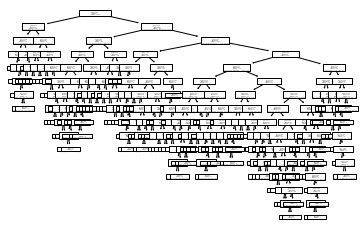

In [15]:
tree.plot_tree(dgntree)
plt.show()

1.2. DIGITS

#### 2. El aprendizaje de arboles de clasificación puede dar lugar a un modelo sobreentrenado si los nodos si dividen hasta conseguir nodos puros. En la librería scikit-learn esto se puede controlar con diferentes parametros definidos en el árbol de clasificación. Consulta las diferentes posibilidades en https://scikit-learn.org/stable/modules/tree.html#tips-on-practical-use y trata de obtener los mejores resultados posibles haciendo un experimento de validación cruzada con la base de datos de los dígitos manuscritos.

Profundidad:15. Intervalo de confianza del error: 0.1647268777157045 +/- 0.0493598341222504


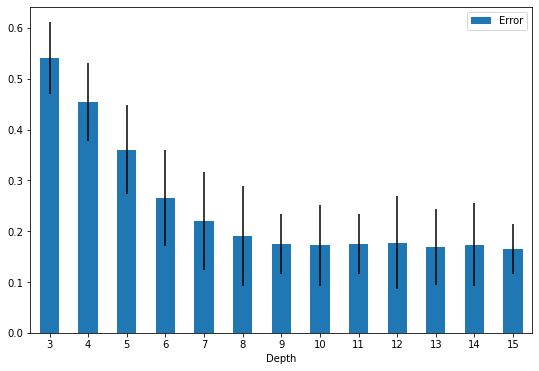

In [16]:
#1 Cambio de profundidad del árbol   
#15 niveles es el que menor error ofrece, aunque podríamos usar 11-12 niveles para no sobreentrenar
#criterio de gini
scores = []
sds = []
Xs = []
for i in range(3,dgntree.get_depth()+1):
    arbol = tree.DecisionTreeClassifier(criterion="gini",max_depth=i)
    score = cross_val_score(arbol,digits_X,digits_Y,cv=10,scoring="accuracy")
    if i==15:
        print(f"Profundidad:{i}. Intervalo de confianza del error: {1-score.mean()} +/- {score.std()*2}")
    scores.append(score.mean())
    sds.append(score.std()*2)
    Xs.append(i)
    
pd.DataFrame({"Depth":Xs,"Error":[1-x for x in scores]}).set_index("Depth").plot.bar(yerr=sds,figsize= (9,6),rot=0)
plt.show()

Profundidad:9. Intervalo de confianza del error: 0.18310055865921782 +/- 0.11128324057785925
0


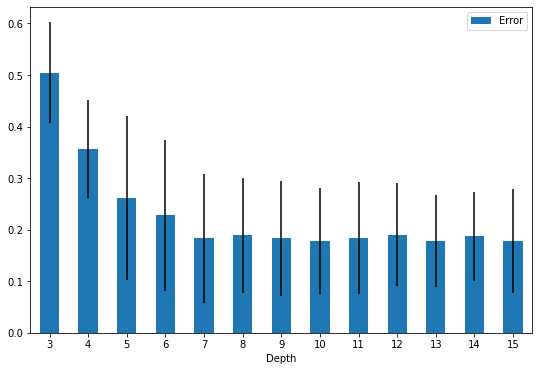

In [17]:
#criterio de entropía
#Parece ser que 11-13 niveles proporcionan mejores resultados
scores = []
sds = []
Xs = []
for i in range(3,dgntree.get_depth()+1):
    arbol = tree.DecisionTreeClassifier(criterion="entropy",max_depth=i)
    score = cross_val_score(arbol,digits_X,digits_Y,cv=10,scoring="accuracy")
    if i==9:
        print(f"Profundidad:{i}. Intervalo de confianza del error: {1-score.mean()} +/- {score.std()*2}")
    scores.append(score.mean())
    sds.append(score.std()*2)
    Xs.append(i)
pd.DataFrame({"Depth":Xs,"Error":[1-x for x in scores]}).set_index("Depth").plot.bar(yerr=sds,figsize= (9,6),rot=0)
plt.show()

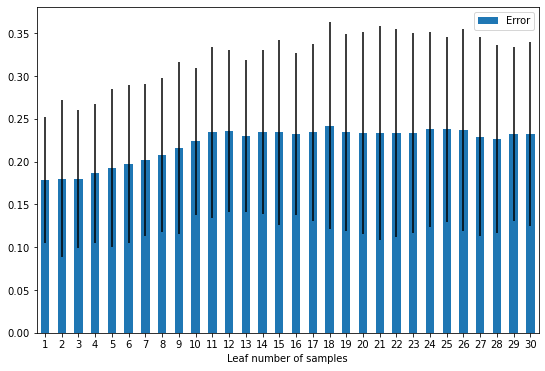

In [47]:
#2. Cambio del número de datos por hoja
scores = []
sds = []
Xs = []
for i in range(1,31):
    arbol = tree.DecisionTreeClassifier(criterion="gini",min_samples_leaf = i)
    score = cross_val_score(arbol,digits_X,digits_Y,cv=10,scoring="accuracy")
    #print(f"Datos en hoja:{i}. Intervalo de confianza: {score.mean()} +/- {score.std()*2}")
    scores.append(score.mean())
    sds.append(score.std()*2)
    Xs.append(i)
    
pd.DataFrame({"Leaf number of samples":Xs,"Error":[1-x for x in scores]}).set_index("Leaf number of samples").plot.bar(yerr=sds,figsize= (9,6),rot=0)
plt.show()

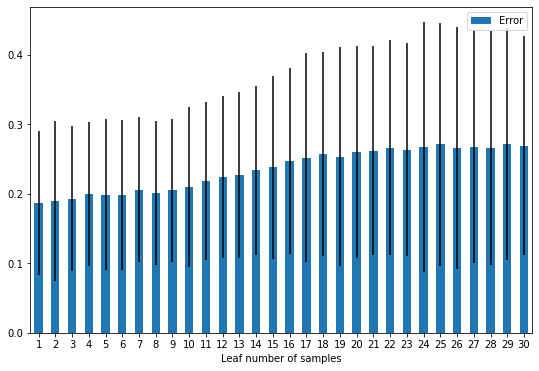

In [50]:
#2. Cambio del número de datos por hoja
scores = []
sds = []
Xs = []
for i in range(1,31):
    arbol = tree.DecisionTreeClassifier(criterion="entropy",min_samples_leaf = i)
    score = cross_val_score(arbol,digits_X,digits_Y,cv=10,scoring="accuracy")
    #print(f"Datos en hoja:{i}. Intervalo de confianza: {score.mean()} +/- {score.std()*2}")
    scores.append(score.mean())
    sds.append(score.std()*2)
    Xs.append(i)
    
pd.DataFrame({"Leaf number of samples":Xs,"Error":[1-x for x in scores]}).set_index("Leaf number of samples").plot.bar(yerr=sds,figsize= (9,6),rot=0)
plt.show()

In [51]:
import graphviz
arbol = tree.DecisionTreeClassifier(criterion="gini",max_depth = 11)
arbol_fit = arbol.fit(digits_X,digits_Y)

dot_data = tree.export_graphviz(arbol_fit, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("digits") 

'digits.pdf'

### Experimentos con partición y validación cruzada

13: 0.17254759129759134 +/- 0.12141839450955978


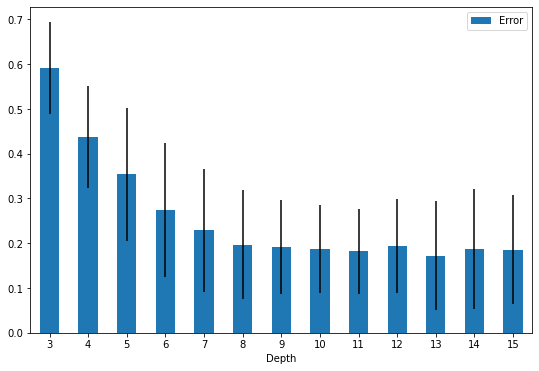

In [50]:
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split
np.random.seed(31415)
digits_X_train, digits_X_test, digits_Y_train, digits_Y_test = train_test_split(
    digits_X, digits.target, test_size=0.2, shuffle=False)
scores = []
sds = []
Xs = []
profs = [i for i in range(3,dgntree.get_depth()+1)]
for i in profs:
    arbol = tree.DecisionTreeClassifier(criterion="gini",max_depth=i)
    score = cross_val_score(arbol,digits_X_train,digits_Y_train,cv=10,scoring="accuracy")
    scores.append(score.mean())
    sds.append(score.std()*2)
    Xs.append(i)
errores = [1-x for x in scores]
mejor_prof = profs[errores.index(min(errores))]
print(f"{mejor_prof}: {errores[profs.index(mejor_prof)]} +/- {sds[profs.index(mejor_prof)]}")
pd.DataFrame({"Depth":Xs,"Error":errores}).set_index("Depth").plot.bar(yerr=sds,figsize= (9,6),rot=0)
plt.show()

11: 0.15861985236985243 +/- 0.10113308597265637


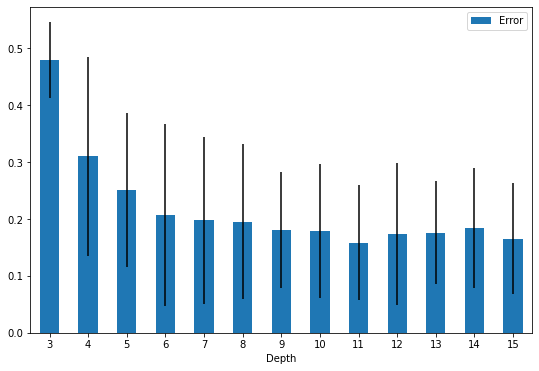

In [51]:
#criterio de entropía
#Parece ser que 11-13 niveles proporcionan mejores resultados
scores = []
sds = []
Xs = []
for i in range(3,dgntree.get_depth()+1):
    arbol = tree.DecisionTreeClassifier(criterion="entropy",max_depth=i)
    score = cross_val_score(arbol,digits_X_train,digits_Y_train,cv=10,scoring="accuracy")
    scores.append(score.mean())
    sds.append(score.std()*2)
    Xs.append(i)
errores = [1-x for x in scores]
mejor_prof = profs[errores.index(min(errores))]
print(f"{mejor_prof}: {errores[profs.index(mejor_prof)]} +/- {sds[profs.index(mejor_prof)]}")
pd.DataFrame({"Depth":Xs,"Error":[1-x for x in scores]}).set_index("Depth").plot.bar(yerr=sds,figsize= (9,6),rot=0)
plt.show()

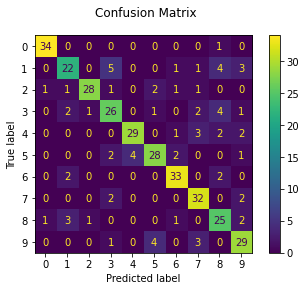

              precision    recall  f1-score   support

           0       0.94      0.97      0.96        35
           1       0.73      0.61      0.67        36
           2       0.93      0.80      0.86        35
           3       0.70      0.70      0.70        37
           4       0.88      0.78      0.83        37
           5       0.80      0.76      0.78        37
           6       0.85      0.89      0.87        37
           7       0.76      0.89      0.82        36
           8       0.66      0.76      0.70        33
           9       0.72      0.78      0.75        37

    accuracy                           0.79       360
   macro avg       0.80      0.79      0.79       360
weighted avg       0.80      0.79      0.79       360



In [55]:
abd1 = tree.DecisionTreeClassifier(criterion="gini",max_depth=13)
abd1.fit(digits_X_train,digits_Y_train)
disp = metrics.plot_confusion_matrix(abd1, digits_X_test, digits_Y_test)
disp.figure_.suptitle("Confusion Matrix")
plt.show()
print(metrics.classification_report(digits_Y_test, abd1.predict(digits_X_test)))

#abd2 = Tree.decissionTreeClassifier(criterion="entropy",max_depth=11)


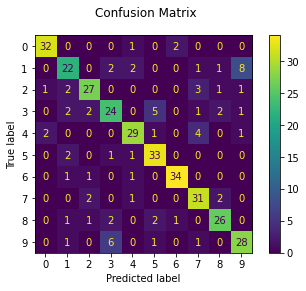

              precision    recall  f1-score   support

           0       0.91      0.91      0.91        35
           1       0.71      0.61      0.66        36
           2       0.82      0.77      0.79        35
           3       0.69      0.65      0.67        37
           4       0.83      0.78      0.81        37
           5       0.79      0.89      0.84        37
           6       0.92      0.92      0.92        37
           7       0.76      0.86      0.81        36
           8       0.81      0.79      0.80        33
           9       0.72      0.76      0.74        37

    accuracy                           0.79       360
   macro avg       0.79      0.79      0.79       360
weighted avg       0.79      0.79      0.79       360



In [58]:
abd2 = tree.DecisionTreeClassifier(criterion="entropy",max_depth=11)
abd2.fit(digits_X_train,digits_Y_train)
disp = metrics.plot_confusion_matrix(abd2, digits_X_test, digits_Y_test)
disp.figure_.suptitle("Confusion Matrix")
plt.show()
print(metrics.classification_report(digits_Y_test, abd2.predict(digits_X_test)))